# Course: MSIS-678 Knowledge Discovery & Data Warehousing 

# Data Science Using Python And R Exercise

Professor: Edward (Ted) Kreutzer
Student: Jun Bao

## CHAPTER4 EXPLORATORY DATA ANALYSIS

For Exercises 21–30, continue working with the bank_marketing_training data set. Use either Python or R to solve each problem.
21. Produce the following graphs. What is the strength of each graph? Weakness?
    a. Bar graph of marital.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split 
import random
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

# import dataset
bank_train = pd.read_csv('bank_marketing_training')
pd.set_option('display.max_columns',25)
bank_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


Text(0.5, 1.0, 'Bar Graph of Marital')

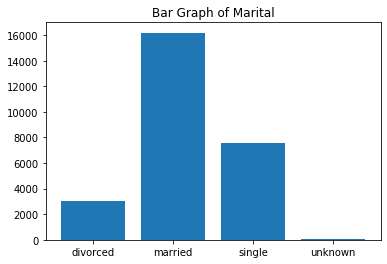

In [2]:
# carete bar graph of material
x = np.unique(bank_train['marital'])
y = bank_train.groupby('marital')['marital'].count()
plt.bar(x, y)
plt.title('Bar Graph of Marital')

b. Bar graph of marital, with overlay of response.

In [3]:
# create a corss with marital and response
crosstab_01 = pd.crosstab(bank_train['marital'], bank_train['response'])
crosstab_01

response,no,yes
marital,,
divorced,2743,312
married,14579,1608
single,6514,1061
unknown,50,7


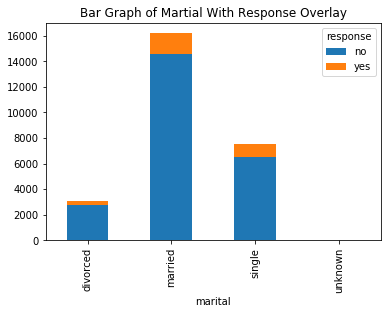

In [4]:
crosstab_01.plot(kind='bar', stacked=True, title='Bar Graph of Martial With Response Overlay')

c. Normalized bar graph of marital, with overlay of response.

In [5]:
crosstab_01_norm = crosstab_01.div(crosstab_01.sum(axis=1), axis=0)
crosstab_01_norm

response,no,yes
marital,,
divorced,0.897872,0.102128
married,0.900661,0.099339
single,0.859934,0.140066
unknown,0.877193,0.122807


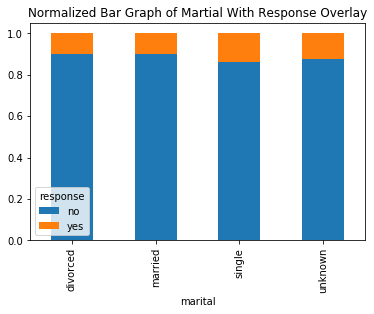

In [6]:
crosstab_01_norm.plot(kind='bar', stacked=True, title='Normalized Bar Graph of Martial With Response Overlay')

In [7]:
# Strenth & weekness
# 1. 21a graph strenth: displays the original marital column data's distribution.
# 2. 21a graph weekness: it's difficult to tell the percentage of different group.
# 3. 21b graph strenth: displays the original data's distribution; with response data overlay, makes it more predictive
# to see which marital group could response better.
# 4. 21b graph weekness: it's difficult to tell the percentage of different group's response.
# 5. 21c graph strenth: displays the the percentation of different marital group's response.
# 6. 21c graph weekness: can't display original data's dristribution.

22. Using the graph from Exercise 21c, describe the relationship between marital and response.

In [8]:
# Single group have the highest yes response proportion. Maried group have the highest no response proportion.

23. Do the following with the variables marital and response.
a. Build a contingency table, being careful to have the correct variables representing
the rows and columns. Report the counts and the column percentages.

In [9]:
crosstab_02 = pd.crosstab(bank_train['response'], bank_train['marital'])

crosstab_02.div(crosstab_02.sum(axis=0), axis=1)

marital,divorced,married,single,unknown
response,,,,
no,0.897872,0.900661,0.859934,0.877193
yes,0.102128,0.099339,0.140066,0.122807


b. Describe what the contingency table is telling you.

In [10]:
# Single group have the highest yes response proportion. Maried group have the highest no response proportion.

24. Repeat the previous exercise, this time reporting the row percentages. Explain the difference between the interpretation of this table and the previous contingency table.

In [11]:
crosstab_02.div(crosstab_02.sum(axis=1), axis=0)

marital,divorced,married,single,unknown
response,,,,
no,0.114837,0.610358,0.272712,0.002093
yes,0.104418,0.538153,0.355087,0.002343


In [12]:
# This contingency table's percentation describs:
# 1. View all the no response as a whole and display how many percentage that the different marital status take up.
# 2. View all the yes response as a whole and display how many percentage that the different marital status take up.

25. Produce the following graphs. What is the strength of each graph? Weakness?
a. Histogram of duration.

Text(0.5, 1.0, 'Duration Histogram')

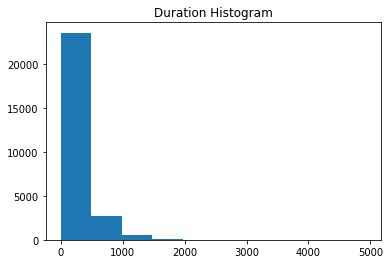

In [13]:
# plot a histogram of duraion
plt.hist(bank_train['duration'], bins=10)
plt.title('Duration Histogram')

b. Histogram of duration, with overlay of response.

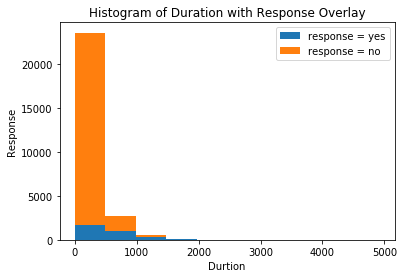

In [14]:
# seperate 2 variables and save them 
bt_dur_y = bank_train[bank_train['response'] == 'yes']['duration']
bt_dur_n = bank_train[bank_train['response'] == 'no']['duration']

# plot the histogram
plt.hist([bt_dur_y, bt_dur_n], bins=10, stacked=True)
plt.legend(['response = yes', 'response = no'])
plt.title('Histogram of Duration with Response Overlay')
plt.xlabel('Durtion'); plt.ylabel('Response'); plt.show()

c. Normalized histogram of duration, with overlay of response.


([array([1.633e+03, 9.790e+02, 2.870e+02, 5.900e+01, 2.200e+01, 4.000e+00,
         1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00]),
  array([2.357e+04, 2.667e+03, 4.950e+02, 9.600e+01, 2.900e+01, 6.000e+00,
         6.000e+00, 3.000e+00, 1.000e+00, 1.000e+00])],
 array([   0. ,  491.8,  983.6, 1475.4, 1967.2, 2459. , 2950.8, 3442.6,
        3934.4, 4426.2, 4918. ]),
 <a list of 2 Lists of Patches objects>)

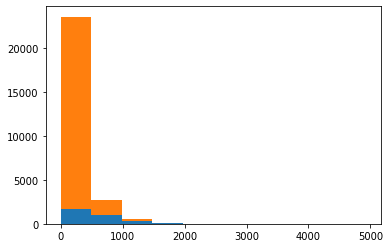

In [15]:
# create a stacked histogram to save the information generated by the histogram
(n, bins, patchs) = plt.hist([bt_dur_y, bt_dur_n], bins=10, stacked=True)
n, bins, patchs

In [16]:
# take the 1-D arrays and stack them as columns to make a 2-D array
n_table = np.column_stack((n[0], n[1]))
n_table

array([[1.633e+03, 2.357e+04],
       [9.790e+02, 2.667e+03],
       [2.870e+02, 4.950e+02],
       [5.900e+01, 9.600e+01],
       [2.200e+01, 2.900e+01],
       [4.000e+00, 6.000e+00],
       [1.000e+00, 6.000e+00],
       [2.000e+00, 3.000e+00],
       [1.000e+00, 1.000e+00],
       [0.000e+00, 1.000e+00]])

In [17]:
# calculate what proportion of the bar is accounted for by each variable
n_norm = n_table / n_table.sum(axis=1)[:, None]
n_norm

array([[0.06479387, 0.93520613],
       [0.26851344, 0.73148656],
       [0.36700767, 0.63299233],
       [0.38064516, 0.61935484],
       [0.43137255, 0.56862745],
       [0.4       , 0.6       ],
       [0.14285714, 0.85714286],
       [0.4       , 0.6       ],
       [0.5       , 0.5       ],
       [0.        , 1.        ]])

In [18]:
# create an array whose rows are the exact cuts of each bin
ourbins = np.column_stack((bins[0:10], bins[1:11]))
ourbins

array([[   0. ,  491.8],
       [ 491.8,  983.6],
       [ 983.6, 1475.4],
       [1475.4, 1967.2],
       [1967.2, 2459. ],
       [2459. , 2950.8],
       [2950.8, 3442.6],
       [3442.6, 3934.4],
       [3934.4, 4426.2],
       [4426.2, 4918. ]])

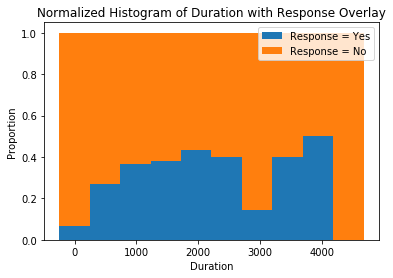

In [19]:
# plot the normalized histogram
p1 = plt.bar(x = ourbins[:, 0], height = n_norm[:, 0], width = ourbins[:, 1] - ourbins[:, 0])
p1 = plt.bar(x = ourbins[:, 0], height = n_norm[:, 1], width = ourbins[:, 1] - ourbins[:, 0], bottom = n_norm[:, 0])
plt.legend(['Response = Yes', 'Response = No'])
plt.title('Normalized Histogram of Duration with Response Overlay')
plt.xlabel('Duration'); plt.ylabel('Proportion'); plt.show()

26. Using the graph from Exercise 25c, describe the relationship between duration and response.

In [20]:
# In general, with bigger duration, there are larger propotion of yes response. Except, duration between 2400 and 2900 
# there are much less propotion of yes response, and once the duraton is larger than 4400, there is no yes response.

In [21]:
# strength & weakness of the 3 graph
# 1. 25a displays the original data distribution of duration.
# 2. 25b displays the original data distribution of duration with response overlay.
# 3. 25c displays the data propotion of duration with response overlay.

27. Examine the non‐normalized and normalized histograms of duration, with overlay of response. Identify cutoff point(s) for duration, which separate low values of response from high values. Define a new categorical variable, duration_binned, using the cutoff points you identified.

In [22]:
bins_duration = [0, 491.8, 983.6, 1475.4, 1967.2, 2459, 2950.8, 3442.6, 3934.4, 4426.2, 4918]
# bins_duration = [0, 491.8, 2950.8, 3442.6, 3934.4, 4426.2, 4918]
bank_train['duration_binned'] = pd.cut(x=bank_train['duration'], bins=bins_duration, right=False)
bank_train['duration_binned']

0        [0.0, 491.8)
1        [0.0, 491.8)
2        [0.0, 491.8)
3        [0.0, 491.8)
4        [0.0, 491.8)
             ...     
26869    [0.0, 491.8)
26870    [0.0, 491.8)
26871    [0.0, 491.8)
26872    [0.0, 491.8)
26873    [0.0, 491.8)
Name: duration_binned, Length: 26874, dtype: category
Categories (10, interval[float64]): [[0.0, 491.8) < [491.8, 983.6) < [983.6, 1475.4) < [1475.4, 1967.2) ... [2950.8, 3442.6) < [3442.6, 3934.4) < [3934.4, 4426.2) < [4426.2, 4918.0)]

28. Provide the following. Describe each of the results.
a. Contingency table of duration_binned with response, with counts and column
percentages.

In [23]:
crosstab_03 = pd.crosstab(bank_train['duration_binned'], bank_train['response'])
crosstab_03

response,no,yes
duration_binned,,
"[0.0, 491.8)",21937,1633
"[491.8, 983.6)",1688,979
"[983.6, 1475.4)",208,287
"[1475.4, 1967.2)",37,59
"[1967.2, 2459.0)",7,22
"[2459.0, 2950.8)",2,4
"[2950.8, 3442.6)",5,1
"[3442.6, 3934.4)",1,2
"[3934.4, 4426.2)",0,1


b. Non‐normalized bar graph of duration_binned, with response overlay.

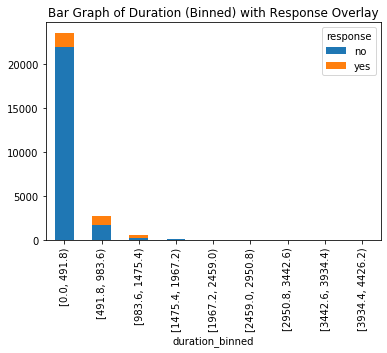

In [24]:
crosstab_03.plot(kind='bar', stacked=True, title='Bar Graph of Duration (Binned) with Response Overlay')

c. Normalized bar graph of duration_binned, with response overlay.

In [25]:
# create normalized crosstab_03
crosstab_03_norm = crosstab_03.div(crosstab_03.sum(axis=1), axis=0)
crosstab_03_norm

response,no,yes
duration_binned,,
"[0.0, 491.8)",0.930717,0.069283
"[491.8, 983.6)",0.632921,0.367079
"[983.6, 1475.4)",0.420202,0.579798
"[1475.4, 1967.2)",0.385417,0.614583
"[1967.2, 2459.0)",0.241379,0.758621
"[2459.0, 2950.8)",0.333333,0.666667
"[2950.8, 3442.6)",0.833333,0.166667
"[3442.6, 3934.4)",0.333333,0.666667
"[3934.4, 4426.2)",0.000000,1.000000


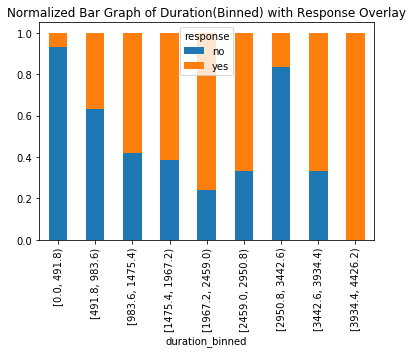

In [26]:
# plot the normalized bar graph
crosstab_03_norm.plot(kind='bar', stacked=True, title='Normalized Bar Graph of Duration(Binned) with Response Overlay')

29. Construct a contingency table of job with response, with counts and column percentages.

In [27]:
# create the crosstab
corsstab_04 = pd.crosstab(bank_train['job'], bank_train['response'])
corsstab_04

response,no,yes
job,,
admin.,5903,854
blue-collar,5631,420
entrepreneur,842,72
housemaid,639,70
management,1680,209
retired,852,291
self-employed,825,93
services,2380,201
student,404,194


In [28]:
# nomalize the crosstab
corsstab_04_norm = corsstab_04.div(corsstab_04.sum(axis=1), axis=0)
corsstab_04_norm

# the 2nd way to create a normalized cross tab
# corsstab_04_norm = pd.crosstab(bank_train['job'], bank_train['response']).apply(lambda r: r/r.sum(), axis=1)
# corsstab_04_norm

response,no,yes
job,,
admin.,0.873613,0.126387
blue-collar,0.930590,0.069410
entrepreneur,0.921225,0.078775
housemaid,0.901269,0.098731
management,0.889359,0.110641
retired,0.745407,0.254593
self-employed,0.898693,0.101307
services,0.922123,0.077877
student,0.675585,0.324415


30. Referring to the previous exercise, do the following:
a. Combine the job categories according to the following response percentages: 0 < 10,
10 < 25, 25 < 33. Name the new variable job2.

In [29]:
# select the yes column value in corsstab_04_norm data frame and conver to dictionary format
corsstab_04_norm_dict = corsstab_04_norm['yes'].to_dict()
# create a new clumn job2 and map the dictonary value (yes response percentage) to the new column based on the value in job column
bank_train['job2'] = bank_train['job'].map(corsstab_04_norm_dict)
# apply if-else-elif condition in job2 column to combine the response percentages: 0 < 10, 10 < 25, 25 < 33
bank_train['job2'] = np.where(bank_train['job2'] < 0.1, '0<10', np.where(bank_train['job2'] >= 0.25 , '25<33', '10<25') )

bank_train


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,duration_binned,job2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,"[0.0, 491.8)",0<10
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,"[0.0, 491.8)",0<10
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,"[0.0, 491.8)",0<10
3,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,"[0.0, 491.8)",0<10
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,"[0.0, 491.8)",0<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,"[0.0, 491.8)",10<25
26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,"[0.0, 491.8)",10<25
26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963,no,"[0.0, 491.8)",10<25
26872,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,"[0.0, 491.8)",25<33


b. Provide a contingency table of job2 with response, with counts and column percent-
ages. Describe what you see.

In [30]:
# create the crosstab of job2 with response
crosstab_job2 = pd.crosstab(bank_train['job2'], bank_train['response'])

In [31]:
# normalize the crosstab
crosstab_job2_norm = crosstab_job2.div(crosstab_job2.sum(axis=1), axis=0)
crosstab_job2_norm

response,no,yes
job2,,
0<10,0.925597,0.074403
10<25,0.883049,0.116951
25<33,0.721424,0.278576


In [32]:
# The yes response percentage meet the job2 description

c. Provide a normalized histogram of job2 with response. Describe the relationship.

In [33]:
# seperate column job2 by yes or no reponse and save the results into 2 different variables
bt_job2_y = bank_train[bank_train['response'] == 'yes']['job2']
bt_job2_n = bank_train[bank_train['response'] == 'no']['job2']
bt_job2_y, bt_job2_n

(42        0<10
 48        0<10
 51       10<25
 175       0<10
 239       0<10
          ...  
 26865    25<33
 26866    10<25
 26867    25<33
 26870    10<25
 26872    25<33
 Name: job2, Length: 2988, dtype: object,
 0         0<10
 1         0<10
 2         0<10
 3         0<10
 4         0<10
          ...  
 26864    10<25
 26868    25<33
 26869    10<25
 26871    10<25
 26873     0<10
 Name: job2, Length: 23886, dtype: object)

array([[0.06925032, 0.93074968],
       [0.10470574, 0.89529426],
       [0.2178796 , 0.7821204 ]])

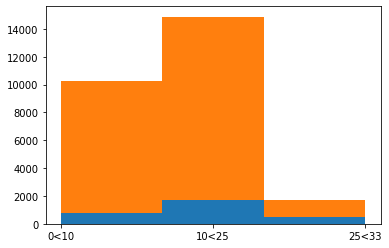

In [34]:
# create normalized n_table
(n, bins, patchs) = plt.hist([bt_job2_y, bt_job2_n], bins=3, stacked=True)
n_table = np.column_stack([n[0], n[1]])
n_table_norm = n_table / n_table.sum(axis=1)[:,None]
n_table_norm

In [35]:
# create an array whose rows are the exact cuts of each bin
ourbins = np.column_stack((bins[0:3], bins[1:4]))
ourbins

array([[0.        , 0.66666667],
       [0.66666667, 1.33333333],
       [1.33333333, 2.        ]])

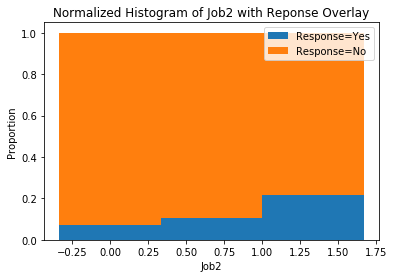

In [36]:
# plot the normalized histogram
p1 = plt.bar(x=ourbins[:, 0], height=n_table_norm[:, 0], width=ourbins[:, 1]-ourbins[:, 0])
p2 = plt.bar(x=ourbins[:, 0], height=n_table_norm[:, 1], width=ourbins[:, 1]-ourbins[:, 0], bottom=n_table_norm[:, 0])
plt.legend(['Response=Yes', 'Response=No'])
plt.title('Normalized Histogram of Job2 with Reponse Overlay')
plt.xlabel('Job2'); plt.ylabel('Proportion'); plt.show()

For Exercises 31–36, work with the cereals data set. Use either Python or R to solve each problem.
31. Create a bar graph of the Manuf variable with Type overlay.

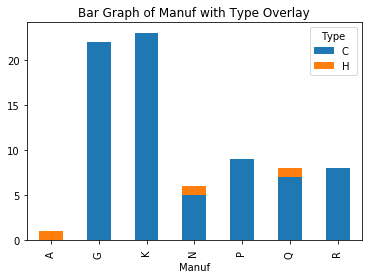

In [37]:
cereal = pd.read_csv('cereals.csv')
crosstab_manuf_type = pd.crosstab(cereal['Manuf'], cereal['Type'])
crosstab_manuf_type.plot(kind='bar', stacked=True, title='Bar Graph of Manuf with Type Overlay')

32. Create a normalized bar graph of the Manuf variable with Type overlay.

In [38]:
# create the normalized crosstab
crosstab_manuf_type_norm = crosstab_manuf_type.div(crosstab_manuf_type.sum(axis=1), axis=0)
crosstab_manuf_type_norm

Type,C,H
Manuf,,
A,0.000000,1.000000
G,1.000000,0.000000
K,1.000000,0.000000
N,0.833333,0.166667
P,1.000000,0.000000
Q,0.875000,0.125000
R,1.000000,0.000000


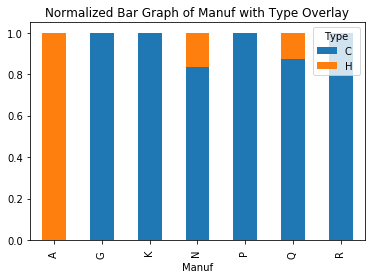

In [39]:
# plot the normalized bar graph
crosstab_manuf_type_norm.plot(kind='bar', stacked=True, title='Normalized Bar Graph of Manuf with Type Overlay')

33. Create a contingency table of Manuf and Type.

In [40]:
crosstab_manuf_type = pd.crosstab(cereal['Manuf'], cereal['Type'])

34. Create a histogram of Calories with Manuf overlay.

In [41]:
# Seperate variable Coalories by different values of Manuf
cr_cal_a = cereal[cereal['Manuf'] == 'A ']['Calories']
cr_cal_g = cereal[cereal['Manuf'] == 'G ']['Calories']
cr_cal_k = cereal[cereal['Manuf'] == 'K ']['Calories']
cr_cal_n = cereal[cereal['Manuf'] == 'N ']['Calories']
cr_cal_p = cereal[cereal['Manuf'] == 'P ']['Calories']
cr_cal_q = cereal[cereal['Manuf'] == 'Q ']['Calories']
cr_cal_r = cereal[cereal['Manuf'] == 'R ']['Calories']
cr_cal_a,cr_cal_g, cr_cal_k, cr_cal_n,cr_cal_p, cr_cal_q, cr_cal_r

(43    100
 Name: Calories, dtype: int64,
 5     110
 7     130
 11    110
 12    120
 13    110
 14    110
 18    110
 22    100
 31    110
 36    110
 40    110
 42    110
 47    100
 51    130
 59    100
 69    110
 70    140
 71    100
 72    110
 73    110
 75    100
 76    110
 Name: Calories, dtype: int64,
 2      70
 3      50
 6     110
 16    100
 17    110
 19    110
 21    110
 24    110
 25    110
 26    100
 28    120
 38    110
 39    140
 46    160
 48    120
 49    140
 50     90
 53    100
 58    120
 60     90
 62    110
 66    110
 67    110
 Name: Calories, dtype: int64,
 0      70
 20    100
 63     80
 64     90
 65     90
 68     90
 Name: Calories, dtype: int64,
 9      90
 27    120
 29    110
 30    100
 32    100
 33    110
 34    120
 37    110
 52    120
 Name: Calories, dtype: int64,
 1     120
 10    120
 35    120
 41    100
 54     50
 55     50
 56    100
 57    100
 Name: Calories, dtype: int64,
 4     110
 8      90
 15    110
 23    100
 44    150


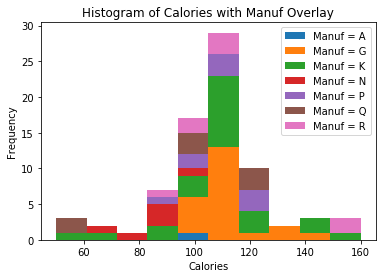

In [42]:
# plot the histogram 
plt.hist([cr_cal_a, cr_cal_g, cr_cal_k, cr_cal_n, cr_cal_p, cr_cal_q, cr_cal_r], bins=10, stacked=True)
plt.legend(['Manuf = A','Manuf = G', 'Manuf = K', 'Manuf = N', 'Manuf = P', 'Manuf = Q', 'Manuf = R'])
plt.title('Histogram of Calories with Manuf Overlay')
plt.xlabel('Calories'); plt.ylabel('Frequency'); plt.show()

In [43]:
#34. Create a histogram of Calories with Manuf overlay (Answer from Prof.)
ccm = pd.crosstab(cereal['Calories'],cereal['Manuf'])
ccm

Manuf,A,G,K,N,P,Q,R
Calories,,,,,,,
50,0,0,1,0,0,2,0
70,0,0,1,1,0,0,0
80,0,0,0,1,0,0,0
90,0,0,2,3,1,0,1
100,1,5,3,1,2,3,2
110,0,13,10,0,3,0,3
120,0,1,3,0,3,3,0
130,0,2,0,0,0,0,0
140,0,1,2,0,0,0,0


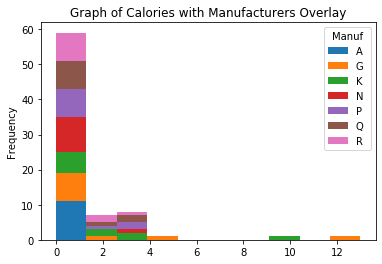

In [44]:
# Answer from Prof.
ccm.plot.hist(stacked = True, title='Graph of Calories with Manufacturers Overlay')

35. Create a normalized histogram of Calories with Manuf overlay.

[array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([ 0.,  0.,  0.,  0.,  6., 13.,  1.,  2.,  1.,  0.]),
 array([ 1.,  1.,  0.,  2.,  9., 23.,  4.,  2.,  3.,  1.]),
 array([ 1.,  2.,  1.,  5., 10., 23.,  4.,  2.,  3.,  1.]),
 array([ 1.,  2.,  1.,  6., 12., 26.,  7.,  2.,  3.,  1.]),
 array([ 3.,  2.,  1.,  6., 15., 26., 10.,  2.,  3.,  1.]),
 array([ 3.,  2.,  1.,  7., 17., 29., 10.,  2.,  3.,  3.])]

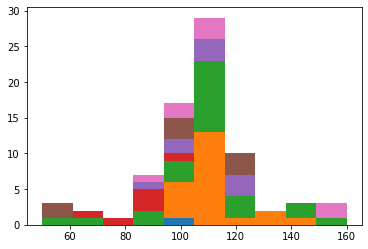

In [45]:
# save several pieces of information of the histogram to 3 different variables. 
# n for the height of the histogram bar; bins for the boundries of each bins; patches for 
(n, bins, patchs) = plt.hist([cr_cal_a, cr_cal_g, cr_cal_k, cr_cal_n, cr_cal_p, cr_cal_q, cr_cal_r], bins=10, stacked=True)

n

In [46]:
# create n_table to conbine the 7 different variables's bar height into one array 
n_table_manuf = np.column_stack((n[0], n[1], n[2], n[3], n[4], n[5], n[6]))
n_table_manuf

array([[ 0.,  0.,  1.,  1.,  1.,  3.,  3.],
       [ 0.,  0.,  1.,  2.,  2.,  2.,  2.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  2.,  5.,  6.,  6.,  7.],
       [ 1.,  6.,  9., 10., 12., 15., 17.],
       [ 0., 13., 23., 23., 26., 26., 29.],
       [ 0.,  1.,  4.,  4.,  7., 10., 10.],
       [ 0.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 0.,  1.,  3.,  3.,  3.,  3.,  3.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  3.]])

In [47]:
# calculate what propotion of the bar is accounted for by each variable 
n_table_manuf_norm = n_table_manuf / n_table_manuf.sum(axis = 1)[:, None]
n_table_manuf_norm


array([[0.        , 0.        , 0.11111111, 0.11111111, 0.11111111,
        0.33333333, 0.33333333],
       [0.        , 0.        , 0.11111111, 0.22222222, 0.22222222,
        0.22222222, 0.22222222],
       [0.        , 0.        , 0.        , 0.25      , 0.25      ,
        0.25      , 0.25      ],
       [0.        , 0.        , 0.07692308, 0.19230769, 0.23076923,
        0.23076923, 0.26923077],
       [0.01428571, 0.08571429, 0.12857143, 0.14285714, 0.17142857,
        0.21428571, 0.24285714],
       [0.        , 0.09285714, 0.16428571, 0.16428571, 0.18571429,
        0.18571429, 0.20714286],
       [0.        , 0.02777778, 0.11111111, 0.11111111, 0.19444444,
        0.27777778, 0.27777778],
       [0.        , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.16666667],
       [0.        , 0.0625    , 0.1875    , 0.1875    , 0.1875    ,
        0.1875    , 0.1875    ],
       [0.        , 0.        , 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.4

In [48]:
# create an array with for the boundaries of each bins 
ourbins_manuf = np.column_stack((bins[0:10], bins[1:11]))
ourbins_manuf

array([[ 50.,  61.],
       [ 61.,  72.],
       [ 72.,  83.],
       [ 83.,  94.],
       [ 94., 105.],
       [105., 116.],
       [116., 127.],
       [127., 138.],
       [138., 149.],
       [149., 160.]])

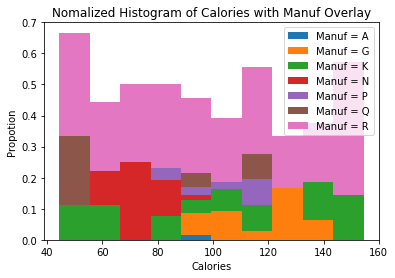

In [49]:
# plot the nomalized histogram 原版
p1 = plt.bar(x=ourbins_manuf[:, 0],height=n_table_manuf_norm[:, 0], width=ourbins_manuf[:, 1]-ourbins_manuf[:, 0])
p2 = plt.bar(x=ourbins_manuf[:, 0],height=n_table_manuf_norm[:, 1], width=ourbins_manuf[:, 1]-ourbins_manuf[:, 0], bottom=n_table_manuf_norm[:, 0])
p3 = plt.bar(x=ourbins_manuf[:, 0],height=n_table_manuf_norm[:, 2], width=ourbins_manuf[:, 1]-ourbins_manuf[:, 0], bottom=n_table_manuf_norm[:, 1])
p4 = plt.bar(x=ourbins_manuf[:, 0],height=n_table_manuf_norm[:, 3], width=ourbins_manuf[:, 1]-ourbins_manuf[:, 0], bottom=n_table_manuf_norm[:, 2])
p5 = plt.bar(x=ourbins_manuf[:, 0],height=n_table_manuf_norm[:, 4], width=ourbins_manuf[:, 1]-ourbins_manuf[:, 0], bottom=n_table_manuf_norm[:, 3])
p6 = plt.bar(x=ourbins_manuf[:, 0],height=n_table_manuf_norm[:, 5], width=ourbins_manuf[:, 1]-ourbins_manuf[:, 0], bottom=n_table_manuf_norm[:, 4])
p7 = plt.bar(x=ourbins_manuf[:, 0],height=n_table_manuf_norm[:, 6], width=ourbins_manuf[:, 1]-ourbins_manuf[:, 0], bottom=n_table_manuf_norm[:, 5])
plt.legend(['Manuf = A','Manuf = G', 'Manuf = K', 'Manuf = N', 'Manuf = P', 'Manuf = Q', 'Manuf = R'])
plt.title('Nomalized Histogram of Calories with Manuf Overlay')
plt.xlabel('Calories'), plt.ylabel('Propotion'); plt.show()



36. Bin the Calories variable using bins for 0–90, 90–110, and over 110 calories. Create a bar chart of the binned calories variable with Manuf overlay.

In [50]:
cereal['calories_binned'] = pd.cut(x=cereal['Calories'], bins=[0, 90, 110, 200],\
                                   labels=['Under 90','90 to 110', 'Over 110'], right=False)

In [51]:
corsstab_binnedcal_manuf = pd.crosstab(cereal['calories_binned'], cereal['Manuf'])

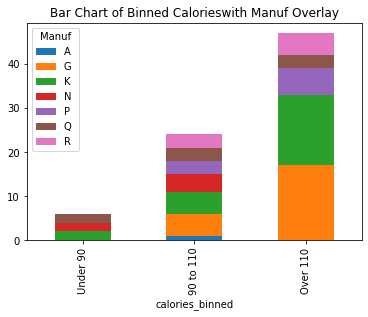

In [52]:
corsstab_binnedcal_manuf.plot(kind='bar', stacked=True, title='Bar Chart of Binned Calories\
with Manuf Overlay')

For Exercises 37–60, use the adult_ch3_training data set.
For Exercises 37–40 we demonstrate an example of why it is not recommended to delete outliers at the EDA stage, because it results in changing the character of the data set.

In [53]:
adult_ch3_train = pd.read_csv('adult_ch3_training')

37. Consider capital‐loss. Identify the outliers in capital‐loss using the Z‐score method.
How many outliers are there?

In [54]:
adult_ch3_train['cap_loss_z'] = stats.zscore(adult_ch3_train['capital-loss'])
cap_loss_outliers = adult_ch3_train.query('cap_loss_z>3 | \
                                          cap_loss_z<-3')
cap_loss_outliers_num = cap_loss_outliers['cap_loss_z'].count()
cap_loss_outliers_num

679

In [55]:
''' There are 679 capital‐loss outliers.'''

' There are 679 capital‐loss outliers.'

38. Construct a bar graph of Income for these outlier records.

In [56]:
corsstab_income_cap_z = pd.crosstab(cap_loss_outliers['income'], cap_loss_outliers['cap_loss_z'])
corsstab_income_cap_z
# something wrong here, need help

cap_loss_z,3.079973,3.178421,3.247334,3.436845,3.483607,3.569749,3.631278,3.653429,3.668196,3.695269,3.705114,3.724803,...,5.797120,5.829116,5.866034,6.050622,6.080157,6.188449,6.732370,7.175384,8.846528,9.060651,9.380605,10.502905
income,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,3,3,11,10,13,1,0,2,10,12,4,21,...,0,1,0,0,0,1,0,0,0,1,1,2
>50K,0,0,0,11,0,0,13,0,0,0,0,0,...,2,0,1,3,7,0,5,1,1,0,0,0


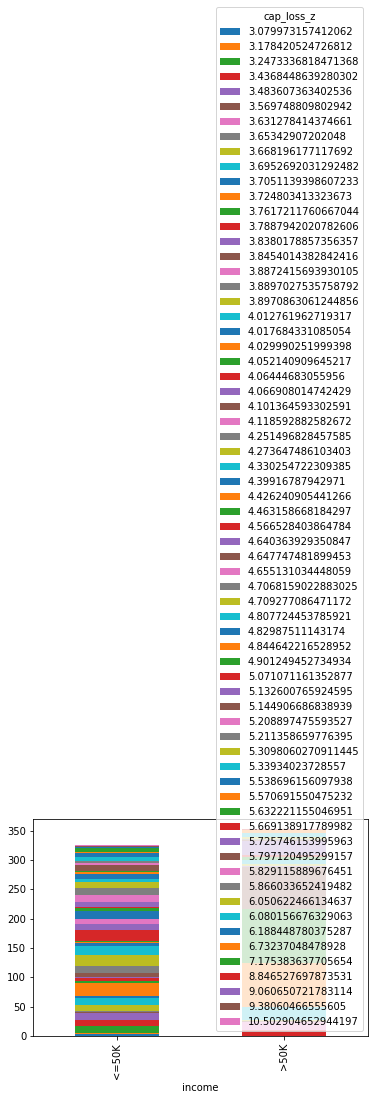

In [57]:
corsstab_income_cap_z.plot(kind='bar', stacked=True)

In [58]:
#38. Construct a bar graph of Income for these outlier records. (Answer from Prof.)
 # adult_outliers = adult.query('cap_loss_z > 3 | cap_loss_z <-3')

# same as my solution in Q.37
 #cap_loss_outliers = adult_ch3_train.query('cap_loss_z>3 | cap_loss_z<-3')

In [59]:
cap_loss_outliers.income.value_counts(ascending = True)

<=50K    326
>50K     353
Name: income, dtype: int64

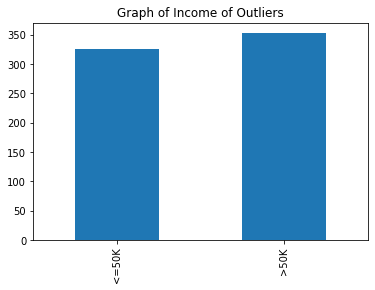

In [60]:
# Answer from Prof.
cap_loss_outliers.income.value_counts(ascending = True).plot.bar(stacked = True, title='Graph of Income of Outliers')

39. Construct a bar graph of Income for the adult_ch3_training data set as a whole, without omitting the outliers.

<BarContainer object of 2 artists>

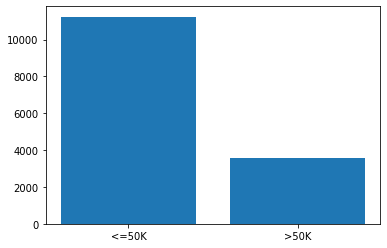

In [61]:
x = adult_ch3_train['income'].unique()
y = adult_ch3_train.groupby('income')['income'].count()
plt.bar(x,y)


In [62]:
# Solution from Professor:
#39. Construct a bar graph of Income for the adult_ch3_training data set as a whole, without omitting the outliers.
'''
adult.income.value_counts(ascending = False).plot.bar(stacked = True, title='Graph of Income of All Samples')
'''

"\nadult.income.value_counts(ascending = False).plot.bar(stacked = True, title='Graph of Income of All Samples')\n"

40. Compare your bar graphs from the previous two exercises. Describe the difference bet- ween the two bar graphs. Describe the change to the character of the data set that will result if we delete these outlier records. State your conclusion regarding deleting out- liers at the EDA stage.


In [63]:
'''There are much more people with income less than 50 than people earning more than 50k.\
We should not delete the outliders at EAD stage which will result incomplete data graph'''

'There are much more people with income less than 50 than people earning more than 50k.We should not delete the outliders at EAD stage which will result incomplete data graph'

41. Derive a flag for capital‐loss, called capital‐loss‐flag, which equals 0 when capital‐loss equals 0, and 1 otherwise. Provide a bar graph of capital‐loss‐flag.

In [64]:
adult_ch3_train['capital‐loss‐flag'] = np.where(adult_ch3_train['capital-loss']== 0, 0, 1)
adult_ch3_train

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,cap_loss_z,capital‐loss‐flag
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,-0.218014,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-0.218014,0
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.218014,0
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,-0.218014,0
...,...,...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,-0.218014,0
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K,-0.218014,0
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K,-0.218014,0


42. Repeat the previous exercise for capital‐gain‐flag.

In [65]:
adult_ch3_train['capital‐gain‐flag'] = np.where(adult_ch3_train['capital-gain']==0, 0, 1)
adult_ch3_train

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,cap_loss_z,capital‐loss‐flag,capital‐gain‐flag
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,-0.218014,0,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0,0
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-0.218014,0,0
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.218014,0,0
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,-0.218014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,-0.218014,0,0
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0,0
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K,-0.218014,0,0
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K,-0.218014,0,0


43. Construct a contingency table of capital‐loss‐flag vs Income. Include counts and column
percentages. Clearly describe the effect of having any capital losses on Income.

In [66]:
crosstab_cap_loss_income = pd.crosstab(adult_ch3_train['capital‐loss‐flag'], \
                                       adult_ch3_train['income'])
round(crosstab_cap_loss_income.div(crosstab_cap_loss_income.sum(axis=1), axis=0)*100, 1)

income,<=50K,>50K
capital‐loss‐flag,,
0,77.3,22.7
1,49.4,50.6


44. Construct a contingency table of capital‐gain‐flag vs Income. Include counts and
column percentages. Clearly describe the effect of having any capital gains on Income.

In [67]:
crosstab_cap_gf_income = pd.crosstab(adult_ch3_train['capital‐gain‐flag'], \
                                     adult_ch3_train['income'])
round(crosstab_cap_gf_income.div(crosstab_cap_gf_income.sum(axis=1), axis=0)*100, 1)

income,<=50K,>50K
capital‐gain‐flag,,
0,79.4,20.6
1,38.1,61.9


45. To prepare for further work, rename workclass as workclass‐old, marital‐status as
marital‐status‐old, and occupation as occupation‐old.

In [68]:
adult_ch3_train.rename(columns={'workclass': 'workclass‐old', 'marital-status': \
                                'marital‐status‐old', 'occupation': 'occupation‐old'},\
                      inplace=True)
adult_ch3_train

,age,workclass‐old,education,marital‐status‐old,occupation‐old,sex,capital-gain,capital-loss,income,cap_loss_z,capital‐loss‐flag,capital‐gain‐flag
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,-0.218014,0,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0,0
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,-0.218014,0,0
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,-0.218014,0,0
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,-0.218014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,-0.218014,0,0
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0,0
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K,-0.218014,0,0
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K,-0.218014,0,0


46. Construct a contingency table with income for the rows and workclass‐old for the
columns, asking for counts and column percentages.

In [69]:
crosstab_income_work = pd.crosstab(adult_ch3_train['income'], adult_ch3_train['workclass‐old'])
round(crosstab_income_work.div(crosstab_income_work.sum(axis=1), axis=0)*100, 1)

workclass‐old,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
<=50K,6.6,2.4,6.0,0.0,71.7,1.9,7.3,3.8,0.0
>50K,2.3,5.0,8.2,0.0,62.4,7.9,9.7,4.6,0.0


47. Referring to the contingency table from the previous exercise, do the following:
a. Provide a one‐sentence rationale for why we should combine never‐worked and without‐pay into no‐pay.

In [70]:
'''Because in these 2 columns, the counts are 0, and never-worked and without-pay\
both means earn no money. In genreal, these 2 column should be to the same category'''

'Because in these 2 columns, the counts are 0, and never-worked and without-payboth means earn no money. In genreal, these 2 column should be to the same category'

b. Provide a one‐sentence rationale for why we may combine local‐gov and state‐gov into state‐local‐gov.

In [71]:
'''Because local-gov and state-gov belong to the same category'''

'Because local-gov and state-gov belong to the same category'

48. Perform the changes mentioned in the previous exercise, along with changing “?” to “unknown.” Call the new variable workclass. Construct a contingency table with income for the rows and workclass for the columns, with counts and column percentages. Describe your table using a couple of sentences.

In [72]:
# 1st way to change the value in the rows:
# adult_ch3_train.loc[adult_ch3_train['workclass‐old']=='?','workclass‐old'] = 'unknown'
# 2nd way:
adult_ch3_train['workclass‐old'] = np.where(adult_ch3_train['workclass‐old']=='?','unknown',\
                                            adult_ch3_train['workclass‐old'])
adult_ch3_train['workclass‐old'].unique()

array(['Self-emp-not-inc', 'Private', 'unknown', 'Federal-gov',
       'Self-emp-inc', 'Local-gov', 'State-gov', 'Without-pay',
       'Never-worked'], dtype=object)

49. Construct a contingency table with income for the rows and marital‐status‐old for the columns, asking for counts and column percentages.

In [73]:
crosstab_income_marital = pd.crosstab(adult_ch3_train['income'], adult_ch3_train['marital‐status‐old'])
round(crosstab_income_marital.div(crosstab_income_marital.sum(axis=1), axis=0)*100, 1)

marital‐status‐old,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
income,,,,,,,
<=50K,16.1,0.0,33.2,1.6,41.5,4.0,3.6
>50K,5.9,0.2,85.5,0.4,6.0,0.7,1.4


50. Referring to the contingency table from the previous sentence, provide two sentences of rationale for why we should combine Married‐AF‐spouse and Married‐civ‐spouse into the new category Married, and combine the other statuses into the new category Other.

In [74]:
'''Combine similar categories in order to analyze marital status as a whole'''

'Combine similar categories in order to analyze marital status as a whole'

51. Perform the changes mentioned in the previous exercise. Construct a contingency table with income for the rows and marital‐status for the columns, with counts and column percentages. Describe your table using a couple of sentences.

In [75]:
adult_ch3_train['marital‐status‐old'] = np.where(adult_ch3_train['marital‐status‐old']=='Married-AF-spouse', 'Married', \
                                                 np.where(adult_ch3_train['marital‐status‐old']=='Married-civ-spouse', 'Married', 'Other'))
adult_ch3_train['marital‐status‐old'].unique()


array(['Married', 'Other'], dtype=object)

In [76]:
crosstab_income_marital = pd.crosstab(adult_ch3_train['income'], adult_ch3_train['marital‐status‐old'])
round(crosstab_income_marital.div(crosstab_income_marital.sum(axis=1), axis=0)*100, 1)
'''Married people takes much more percentage with income more than 50k than other marital status people'''

'Married people takes much more percentage with income more than 50k than other marital status people'

52. Construct a contingency table with income for the rows and occupation‐old for the columns, asking for counts and column percentages.

In [77]:
crosstab_income_occ = pd.crosstab(adult_ch3_train['income'], adult_ch3_train['occupation‐old'])
round(crosstab_income_occ.div(crosstab_income_occ.sum(axis=1), axis=0)*100, 1)

occupation‐old,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,,
<=50K,6.7,13.3,0.0,12.9,8.1,3.8,5.1,7.1,13.0,0.7,9.1,1.9,10.7,2.6,5.1
>50K,2.3,7.1,0.0,10.7,24.6,1.3,1.2,3.0,1.6,0.0,25.1,2.9,12.9,3.5,3.8


53. Provide one sentence each for why we should do the following combinations:
a. Exec‐managerial and Prof‐specialty into the new category Exec/prof.

In [78]:
'''In order to plot a clear graph, we should combine the similar categories. \
Exec‐managerial and Prof‐specialty are similar categories.'''

'In order to plot a clear graph, we should combine the similar categories. Exec‐managerial and Prof‐specialty are similar categories.'

In [79]:
# Answer from Prof.
'''#a. Exec‐managerial and Prof‐specialty into the new category Exec/prof.
# These are within 2% of each other, so combining them would not skew data'''

'#a. Exec‐managerial and Prof‐specialty into the new category Exec/prof.\n# These are within 2% of each other, so combining them would not skew data'

b. The occupations with income percentages >50 k into the new category Mid‐level.

In [80]:
# Answer from Prof.
#b. The occupations with income percentages >50 k into the new category Mid‐level.
# occupations in this range are similar in percentages

In [81]:
adult_ch3_train['occupation']=np.where(adult_ch3_train['occupation‐old']=='Priv-house-serv',\
                                      'Low-Level', np.where(adult_ch3_train['occupation‐old']\
                                                            =='Armed-Forces','Low-Level',\
                                                            'Mid-level'))
adult_ch3_train

,age,workclass‐old,education,marital‐status‐old,occupation‐old,sex,capital-gain,capital-loss,income,cap_loss_z,capital‐loss‐flag,capital‐gain‐flag,occupation
0,50,Self-emp-not-inc,13,Married,Exec-managerial,Male,0,0,<=50K,-0.218014,0,0,Mid-level
1,38,Private,9,Other,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0,0,Mid-level
2,49,Private,5,Other,Other-service,Female,0,0,<=50K,-0.218014,0,0,Mid-level
3,52,Self-emp-not-inc,9,Married,Exec-managerial,Male,0,0,>50K,-0.218014,0,0,Mid-level
4,31,Private,14,Other,Prof-specialty,Female,14084,0,>50K,-0.218014,0,1,Mid-level
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married,Craft-repair,Male,0,0,<=50K,-0.218014,0,0,Mid-level
14793,32,Private,6,Married,Handlers-cleaners,Male,0,0,<=50K,-0.218014,0,0,Mid-level
14794,32,Private,14,Other,Tech-support,Male,0,0,<=50K,-0.218014,0,0,Mid-level
14795,58,Private,9,Other,Adm-clerical,Female,0,0,<=50K,-0.218014,0,0,Mid-level


c. The remaining occupations into the new category Low‐Level.

In [82]:
# Answer from prof.
#c. The remaining occupations into the new category Low‐Level.
# occupations in this range are similar in percentages and are all below 20% making > 50k

In [83]:
'''same as 53b.'''

'same as 53b.'

d. Fold the unknown category into the Low‐Level category.

In [84]:
'''same as 53b.'''

'same as 53b.'

54. Perform the changes referred to in the previous exercise. Call the new variable occupa- tion. Construct a contingency table with income for the rows and occupation for the columns, with counts and column percentages. Describe your table using a couple of sentences.

In [85]:
crosstab_income_occu = pd.crosstab(adult_ch3_train['income'], adult_ch3_train['occupation'])
round(crosstab_income_occu.div(crosstab_income_occu.sum(axis=1), axis=0)*100, 1)
'''Income equals to or more than 50K are Mid-Level, otherwise Low-Level'''

'Income equals to or more than 50K are Mid-Level, otherwise Low-Level'

55. Do the following for the education variable.
a. Provide a non‐normalized and normalized histogram of education, with an income
overlay.

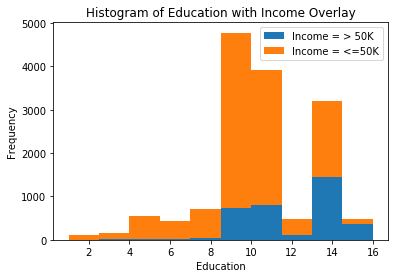

In [86]:
# non-normalized histogram
bt_edu_50more = adult_ch3_train[adult_ch3_train['income']=='>50K']['education']
bt_edu_50less = adult_ch3_train[adult_ch3_train['income']=='<=50K']['education']

plt.hist([bt_edu_50more, bt_edu_50less], bins=10, stacked=True)
plt.legend(['Income = > 50K', 'Income = <=50K'])
plt.title('Histogram of Education with Income Overlay')
plt.xlabel('Education'); plt.ylabel('Frequency'); plt.show()

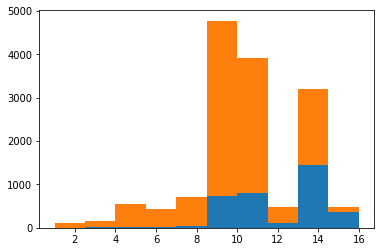

In [87]:
# normalized histogram
(n, bins, patchs) = plt.hist([bt_edu_50more, bt_edu_50less], bins=10, stacked=True)

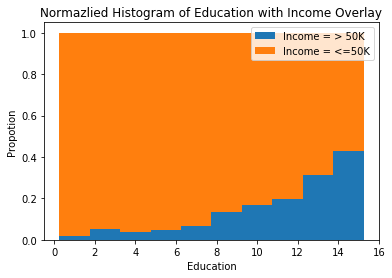

In [88]:
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

p1 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 0], width=ourbins[:, 1]-ourbins[:, 0])
p2 = plt.bar(x=ourbins[:, 0], height=n_norm[:, 1], width=ourbins[:, 1]-ourbins[:, 0],\
             bottom=n_norm[:, 0])
plt.legend(['Income = > 50K', 'Income = <=50K'])
plt.title('Normazlied Histogram of Education with Income Overlay')
plt.xlabel('Education'); plt.ylabel('Propotion'); plt.show()


b. Provide a one‐sentence description of the relationship and another sentence on your
expectation regarding the usefulness of education in predicting income.

In [89]:
'''People who have higher education tend to higher income.\
From the histogram we just plotted, we can see there is a positive correlation between\
education and income.'''

'People who have higher education tend to higher income.From the histogram we just plotted, we can see there is a positive correlation betweeneducation and income.'

56. Do the following for the age variable.
a. Provide a non‐normalized and normalized histogram of age, with an income overlay.

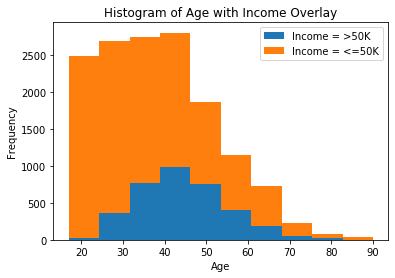

In [90]:
# non‐normalized histogram
bk_age_50more = adult_ch3_train[adult_ch3_train['income']=='>50K']['age']
bk_age_50less = adult_ch3_train[adult_ch3_train['income']=='<=50K']['age']

plt.hist([bk_age_50more, bk_age_50less], bins=10, stacked=True)
plt.legend(['Income = >50K', 'Income = <=50K'])
plt.title('Histogram of Age with Income Overlay')
plt.xlabel('Age'); plt.ylabel('Frequency'); plt.show()

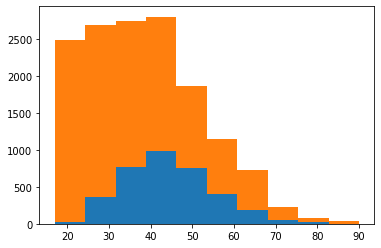

In [91]:
# normalized histogram
(n_age, bins_age, patchs_age) = plt.hist([bk_age_50more, bk_age_50less], bins=10, stacked=True)

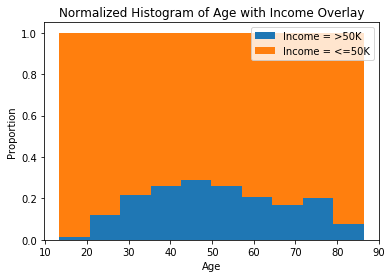

In [92]:
n_table_age = np.column_stack((n_age[0], n_age[1]))
n_norm_age = n_table_age / n_table_age.sum(axis=1)[:, None]
ourbins_age = np.column_stack((bins_age[0:10], bins_age[1:11]))
n_table_age, n_norm_age, ourbins_age
p1 = plt.bar(x=ourbins_age[:, 0], height=n_norm_age[:, 0], width=ourbins_age[:, 1]-ourbins_age[:, 0])
p2 = plt.bar(x=ourbins_age[:, 0], height=n_norm_age[:, 1], width=ourbins_age[:, 1]-ourbins_age[:, 0], \
            bottom=n_norm_age[:, 0])
plt.legend(['Income = >50K', 'Income = <=50K'])
plt.title('Normalized Histogram of Age with Income Overlay')
plt.xlabel('Age'); plt.ylabel('Proportion'); plt.show()


b. Provide a one‐sentence description of the relationship.

In [93]:
'''People at age of 45 display a largest propotion of income more than 50K'''

'People at age of 45 display a largest propotion of income more than 50K'

c. Provide another sentence rationale for the following binning: age<30, age 30–60, age > 60.

In [94]:
'''For people with age<30, thre are much more income less than 50K; for people with age 30-60,\
income more than 50K have higher propotion; for people with age>60, the income more than 50K \
displays a declining trend'''

'For people with age<30, thre are much more income less than 50K; for people with age 30-60,income more than 50K have higher propotion; for people with age>60, the income more than 50K displays a declining trend'

57. Execute the binning mentioned in the previous exercise, by deriving a new variable, age_binned.
a. Provide a normalized bar graph of age_binned with an income overlay.

In [95]:
adult_ch3_train['age_binned'] = pd.cut(x=adult_ch3_train['age'], bins=[0, 30, 60, 100], \
                                      labels=['Under 30', '30 to 60', '60 and Over'], \
                                       right=False)
adult_ch3_train['age_binned'] 

0        30 to 60
1        30 to 60
2        30 to 60
3        30 to 60
4        30 to 60
           ...   
14792    30 to 60
14793    30 to 60
14794    30 to 60
14795    30 to 60
14796    Under 30
Name: age_binned, Length: 14797, dtype: category
Categories (3, object): [Under 30 < 30 to 60 < 60 and Over]

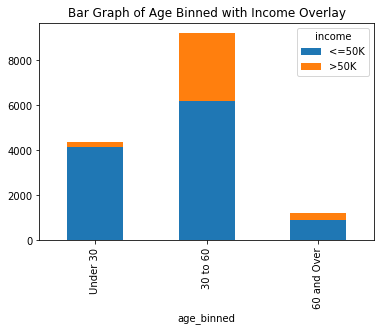

In [96]:
corsstab_agebin_income = pd.crosstab(adult_ch3_train['age_binned'], adult_ch3_train['income'])

corsstab_agebin_income.plot(kind='bar', stacked=True, title='Bar Graph of Age Binned with Income Overlay')

b. Interpret the bar graph using a sentence.

In [97]:
'''People with age 30<=age<60 have the highest income, people with age under 30 have the lowest income.'''

'People with age 30<=age<60 have the highest income, people with age under 30 have the lowest income.'

58. Provide the following analysis of the sex predictor.
a. A non‐normalized bar graph of sex, with an overlay of income.

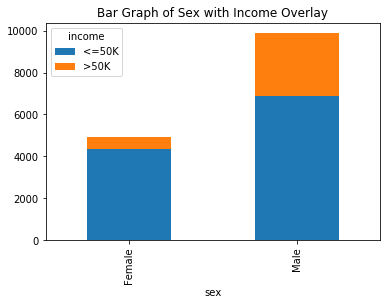

In [98]:
crosstab_sex_income = pd.crosstab(adult_ch3_train['sex'], adult_ch3_train['income'])

crosstab_sex_income.plot(kind='bar', stacked=True, title='Bar Graph of Sex with Income Overlay')

b. A normalized bar graph of sex, with an overlay of income.

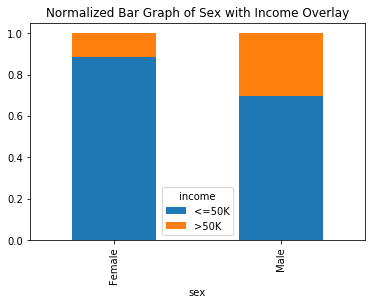

In [99]:
crosstab_sex_income_norm = crosstab_sex_income.div(crosstab_sex_income.sum(axis=1), axis=0)

crosstab_sex_income_norm.plot(kind='bar', stacked=True, title='Normalized Bar Graph of Sex with Income Overlay')

c. Interpret the normalized bar graph using a sentence.

In [100]:
'''Male earn more than 50k takes much more proportion than female'''

'Male earn more than 50k takes much more proportion than female'

59. Construct the following:
a. A non‐normalized bar graph of occupation with a sex overlay.

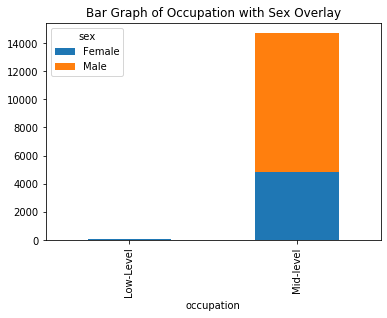

In [101]:
crosstab_occu_sex = pd.crosstab(adult_ch3_train['occupation'], adult_ch3_train['sex'])
crosstab_occu_sex
crosstab_occu_sex.plot(kind='bar', stacked=True, title='Bar Graph of Occupation with Sex Overlay')

b. A normalized bar graph of occupation with a sex overlay. Describe the relationship.

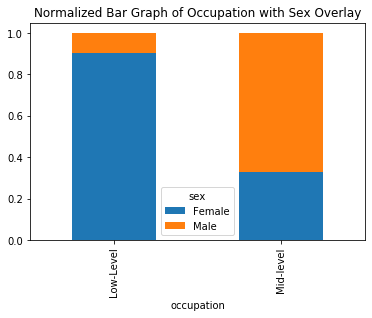

In [102]:
crosstab_occu_sex_norm = crosstab_occu_sex.div(crosstab_occu_sex.sum(axis=1), axis=0)

crosstab_occu_sex_norm.plot(kind='bar', stacked=True, title='Normalized Bar Graph of Occupation with Sex Overlay')

60. Construct a contingency table with sex for the rows and occupation for the columns, with counts and column percentages. Compare the contingency table with the normalized bar graph.

In [103]:
crosstab_sex_occu = pd.crosstab(adult_ch3_train['sex'], adult_ch3_train['occupation'])

crosstab_sex_occu_norm = round(crosstab_sex_occu.div(crosstab_sex_occu.sum(axis=1), axis=0)*100, 1)
crosstab_sex_occu_norm

occupation,Low-Level,Mid-level
sex,,
Female,1.5,98.5
Male,0.1,99.9


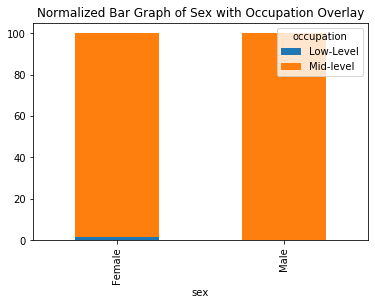

In [104]:
crosstab_sex_occu_norm.plot(kind='bar', stacked=True, title='Normalized Bar Graph of Sex with Occupation Overlay')

## CHAPTER 5 PREPARING TO MODEL THE DATA

In [105]:
adult = pd.read_csv('Adult')
adult

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,41,Private,112507,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K.
24996,19,Private,236940,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K.
24997,33,Private,278514,HS-grad,9,Divorced,Craft-repair,Own-child,White,Female,0,0,42,United-States,<=50K.
24998,21,?,433330,Some-college,10,Never-married,?,Unmarried,White,Male,0,0,40,United-States,<=50K.


For Exercises 21–28, work with the adult data set.
21. Partition the data set, so that 50% of the records are included in the training data set and 50% are included in the test data set. Use a bar graph to confirm your proportions.

In [106]:
adult_train, adult_test = train_test_split(adult, test_size=0.5, random_state=7)
adult.shape, adult_train.shape, adult_test.shape, adult_train, len(adult_train)

((25000, 15),
 (12500, 15),
 (12500, 15),
        age         workclass  demogweight     education  education-num  \
 15055   52           Private       224198       HS-grad              9   
 5758    20           Private       165804  Some-college             10   
 17647   41           Private       216968     Bachelors             13   
 16149   40           Private       353432          10th              6   
 19513   50           Private       174102       HS-grad              9   
 ...    ...               ...          ...           ...            ...   
 919     21           Private       186648  Some-college             10   
 20691   36           Private       265881       HS-grad              9   
 5699    23           Private       149224       HS-grad              9   
 10742   37           Private       231180       HS-grad              9   
 16921   27  Self-emp-not-inc       140863           9th              5   
 
            marital-status         occupation   relation

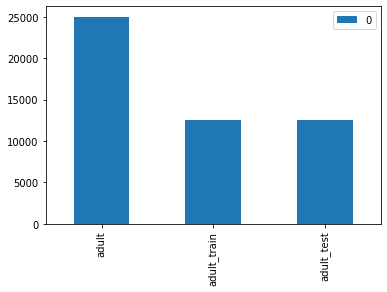

In [107]:
x = pd.DataFrame([len(adult), len(adult_train), len(adult_test)], index=['adult', 'adult_train', 'adult_test'])
x.plot.bar()

22. Identify the total number of records in the training data set, and how many records in the training data set have an income value of >50 K.

In [108]:
adult_train.shape

(12500, 15)

In [109]:
'''12500 records in the training data set'''

'12500 records in the training data set'

In [110]:
adult_train['income'].value_counts()

<=50K.    9519
>50K.     2981
Name: income, dtype: int64

In [111]:
'''2981 records have an income value of >50K'''

'2981 records have an income value of >50K'

23. Use your answers from the previous exercise to calculate how many records with income >50K you need to resample in order to have 35% of the rebalanced data set have incomes of >50 K.

In [112]:
(0.35*12500 - 2981) / (1-0.35)

2144.6153846153848

In [113]:
'''2144 records needed to resample to 35% '''

'2144 records needed to resample to 35% '

24. Perform the rebalancing described in the previous exercise and confirm that 35% of the records in the rebalanced data set have incomes >50 K.

In [114]:
to_resample = adult_train.loc[adult_train['income']=='>50K.']
our_resample = to_resample.sample(n = 2144, replace = True)
adult_train_rebal = pd.concat([adult_train, our_resample])

adult_train_rebal['income'].value_counts()

<=50K.    9519
>50K.     5125
Name: income, dtype: int64

25. Which baseline model do we use to compare our classification model performance against? To which value does this baseline model assign all predictions? What is the accuracy of this baseline model?

In [115]:
'''We should use the Negative Baseline Model in reference to the income value >50K. 
This givs us a baseline accuracy of 65%.'''

'We should use the Negative Baseline Model in reference to the income value >50K. \nThis givs us a baseline accuracy of 65%.'

26. Validate your partition by performing a two‐sample Z‐test for the difference in means for the mean age in the training set versus the mean age in the test set.


In [116]:
# A z-test is a statistical test to determine whether two population means are different when the variances are known
# and the sample size is large. It can be used to test hypotheses in which the z-test follows a normal distribution.

In [117]:
adult_train['age'].mean(), adult_train_rebal['age'].mean(), adult_test['age'].mean()

(38.61032, 39.438951106255125, 38.60352)

In [118]:
# solution from professor:
'''
#    for the mean age in the training set versus the mean age in the test set.
adult_train['age'].mean()
adult_train_rebal.age.mean()
adult_test['age'].mean()

ztest,pval = stests.ztest(adult_train_rebal.age, x2=adult_test['age'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis (the rebalanced set IS valid!)")
else:
    print("accept null hypothesis (the rebalanced set IS NOT valid!)")
# All mean ages are within 1 year
'''

'\n#    for the mean age in the training set versus the mean age in the test set.\nadult_train[\'age\'].mean()\nadult_train_rebal.age.mean()\nadult_test[\'age\'].mean()\n\nztest,pval = stests.ztest(adult_train_rebal.age, x2=adult_test[\'age\'], value=0,alternative=\'two-sided\')\nprint(float(pval))\nif pval<0.05:\n    print("reject null hypothesis (the rebalanced set IS valid!)")\nelse:\n    print("accept null hypothesis (the rebalanced set IS NOT valid!)")\n# All mean ages are within 1 year\n'

27. Validate your partition by performing a two‐sample Z‐test for the difference in propor- tions for the proportion of >50K records in the training set versus the proportion of >50 K records in the test set.

In [119]:
# Solution from Professor:
#    for the proportion of >50K records in the training set versus the proportion of >50 K records
#    in the test set.

adult_train['income'].value_counts(), adult_train_rebal['income'].value_counts(), adult_test['income'].value_counts()


(<=50K.    9519
 >50K.     2981
 Name: income, dtype: int64,
 <=50K.    9519
 >50K.     5125
 Name: income, dtype: int64,
 <=50K.    9497
 >50K.     3003
 Name: income, dtype: int64)

In [120]:
'''  
    
ztest ,pval = stests.ztest(adult_train_rebal.income.value_counts(), x2=adult_test['income'].value_counts(), value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis (the rebalanced set IS valid.)")
else:
    print("accept null hypothesis (the rebalanced set IS NOT valid!)")

# The rebalanced set is not valid for proportion of >50K records

# original training set = ~24%, rebalanced training set = ~35%, test set = ~24%

'''  

'  \n    \nztest ,pval = stests.ztest(adult_train_rebal.income.value_counts(), x2=adult_test[\'income\'].value_counts(), value=0,alternative=\'two-sided\')\nprint(float(pval))\nif pval<0.05:\n    print("reject null hypothesis (the rebalanced set IS valid.)")\nelse:\n    print("accept null hypothesis (the rebalanced set IS NOT valid!)")\n\n# The rebalanced set is not valid for proportion of >50K records\n\n# original training set = ~24%, rebalanced training set = ~35%, test set = ~24%\n\n'

For Exercises 28–34, work with the churn data set.
28. Partition the data set, so that 67% of the records are included in the training data set and
33% are included in the test data set. Use a bar graph to confirm your proportions.

In [121]:
churn = pd.read_csv('churn')

churn_train, churn_test = train_test_split(churn, test_size=0.33, random_state =7)
churn.shape, churn_train.shape, churn_test.shape

((3333, 22), (2233, 22), (1100, 22))

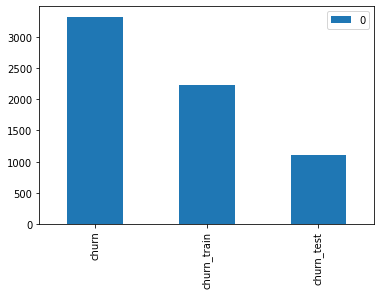

In [122]:
totalrec = np.array([len(churn), len(churn_train), len(churn_test)])
x = pd.DataFrame(totalrec, index=['churn', 'churn_train', 'churn_test'])
x.plot.bar()

29. Identify the total number of records in the training data set and how many records in the training data set have a churn value of true.

In [123]:
churn_train['Churn'].value_counts()

False    1913
True      320
Name: Churn, dtype: int64

In [124]:
'''320 records of true value'''

'320 records of true value'

30. Use your answers from the previous exercise to calculate how many true churn records you need to resample in order to have 20% of the rebalanced data set have true churn values.

In [125]:
(0.2*2233-320)/(1-0.2)

158.25000000000003

In [126]:
'''158 records needed'''

'158 records needed'

31. Perform the rebalancing described in the previous exercise and confirm that 20% of the records in the rebalanced data set have true churn values.

In [127]:
to_resample = churn_train.loc[churn_train['Churn']== True]
our_resample = to_resample.sample(n=158, replace=True)
churn_train_rebal = pd.concat([churn_train, our_resample])

churn_train_rebal['Churn'].value_counts()

False    1913
True      478
Name: Churn, dtype: int64

32. Which baseline model do we use to compare our classification model performance against? To which value does this baseline model assign all predictions? What is the accuracy of this baseline model?

In [128]:
''' Negative Model. 
churn = True
80%'''

' Negative Model. \nchurn = True\n80%'

33. Validate your partition by testing for the difference in mean day minutes for the training set versus the test set.

In [129]:
churn_train['Day Mins'].mean()

179.7530228392298

In [130]:
churn_test['Day Mins'].mean()

179.8199090909088

34. Validate your partition by testing for the difference in proportion of true churn records for the training set versus the test set.

In [131]:
churn_train['Churn'].value_counts()/churn_train['Churn'].count()*100

False    85.669503
True     14.330497
Name: Churn, dtype: float64

In [132]:
churn_test['Churn'].value_counts()/churn_test['Churn'].count()*100

False    85.181818
True     14.818182
Name: Churn, dtype: float64

For Exercise 35, work with the cereals data set. Here, we are trying to estimate a numeric target, rating (nutritional rating), based on a set of predictors.
35. Which baseline model do we use to compare our estimation model performance against? To which value does this baseline model assign all predictions?

In [133]:
cereal = pd.read_csv('cereals.csv')
cereal

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,1,0,0,0,1,0,0
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,1,0,0,0,1,0,0
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,1,0,0,0,0,1,0
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,1,0,0,0,1,0,0


In [134]:
'''Biggest Category Model. Assign to the largest value category'''
'''Use the positive binary baseline for comparison or you could use a k-nary baseline and split into categories'''
'''Assign all predictions to the Rating field whose height value is 93.704912'''

'Assign all predictions to the Rating field whose height value is 93.704912'